# The Julia Opportunistic Network Simulator

In [1]:
#using Pkg
#Pkg.instantiate()

push!(LOAD_PATH, "../src")
push!(LOAD_PATH, "src")

using Random
using DataFrames
using JONS


## Configuration

In [2]:
MOVEMENT_FILE="data/large_1.one"
SCAN_INTERVAL=2.0
NET_RANGE=100
ANIMATION_STEPS = 20.0
VIZ = false
POSLOG = false

false

In [3]:
one_scenario = parse_one_movement(MOVEMENT_FILE)

OneScenario(duration=3600.0, nn=17, w=1000.0, h=1000.0, #movements=18012)

In [4]:
Random.seed!(1)
#plotlyjs()

# configure network
network = NetworkSettings(NET_RANGE, 54000000)

# configure nodes
epidemic = EpidemicRouter(10000, SCAN_INTERVAL)
saw = SprayAndWaitRouter(10000, SCAN_INTERVAL, 7)
nodes = generate_nodes(one_scenario.nn, network, epidemic)

msggenconfig = MessageGeneratorConfig("M", (80, 120), (20.0, 20.0), (6, 15), (17, 17), Burst)
config = Dict()
config["visualize"] = VIZ
config["poslogger"] = POSLOG
#sim = NetSim(last_move_time + 1, (Float32(WORLD_SIZE[1]), Float32(WORLD_SIZE[2])), nodes, movements, MessageGeneratorConfig[msggenconfig], config)
sim = NetSim(one_scenario.duration + 1, (one_scenario.w, one_scenario.h), nodes, one_scenario.movements, MessageGeneratorConfig[msggenconfig], config)

sim_init(sim)
sim_run(sim)

┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


┌ Info: real: 2885 milliseconds sim: 3602 rate: 1248.53 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 2 seconds, 885 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76


## Results

In [5]:
DataFrame(net_stats(sim))

Row,drop,rx,tx
,Int64,Int64,Int64
1,0,104363,104363


In [6]:
DataFrame(bundle_stats(sim))

Row,aborted,created,delivered,delivery_prob,dropped,dups,hops_avg,latency_avg,overhead_ratio,relayed,removed,started
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64
1,0,1800,1664,0.924444,0,81287,3.07151,241.187,61.7181,104363,0,105808


In [7]:
sim_viz(sim)

## Batch Simulation

### Batch Config

In [8]:
const NUM_RUNS = 10
const NUM_NODES = 10
const DURATION = 3600.0
const WORLD_SIZE = (1000, 1000)
NET_RANGE = 50

50

In [16]:
#plotlyjs()

# configure network
network = NetworkSettings(NET_RANGE, 54000000)

# configure nodes
routers = [EpidemicRouter(10000, SCAN_INTERVAL), 
  SprayAndWaitRouter(10000, SCAN_INTERVAL, 7), 
  SprayAndWaitRouter(10000, SCAN_INTERVAL, 2),
  SprayAndWaitRouter(10000, SCAN_INTERVAL, 1)]
#run_idx = 1

dfs = []

@time for run_idx in 1:NUM_RUNS
  Random.seed!(run_idx)
  one_scenario = generate_randomwaypoint_movement(DURATION, NUM_NODES, Float32(WORLD_SIZE[1]), Float32(WORLD_SIZE[2]), Float32(1.0), Float32(5.0), Float32(0.0), Float32(60.0))


  for r in routers
    println("#run ", run_idx, " w/ router: ", r)
    r_strategy = string(r)
    #if r_strategy == "SprayAndWait"
    #  r_strategy = "SprayAndWait_" * string(r.core.config["copies"])
    #end
    #run_idx += 1

    nodes = generate_nodes(one_scenario.nn, network, r)
    
    msggenconfig = MessageGeneratorConfig("M", (80, 120), (20.0, 40.0), (1, one_scenario.nn), (1, one_scenario.nn), Single)
    config = Dict()
    config["visualize"] = VIZ
    config["poslogger"] = POSLOG
    #sim = NetSim(last_move_time + 1, (Float32(WORLD_SIZE[1]), Float32(WORLD_SIZE[2])), nodes, movements, MessageGeneratorConfig[msggenconfig], config)
    sim = NetSim(one_scenario.duration + 1, (one_scenario.w, one_scenario.h), nodes, one_scenario.movements, MessageGeneratorConfig[msggenconfig], config)
    
    sim_init(sim)
    sim_run(sim)

    run_df = DataFrame(bundle_stats(sim))
    colname = "Strategy"
    #run_df[!, colname] = string(r)
    insertcols!(run_df, 1, colname => r_strategy)
    colname = "run"
    insertcols!(run_df, 2, colname => run_idx)    
    push!(dfs, run_df)
  end
end

df = popfirst!(dfs)
for d in dfs
  df = vcat(df, d)
end

df

#run 1 w/ router: Epidemic


┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 1 w/ router: SprayAndWait_7


┌ Info: real: 325 milliseconds sim: 3602 rate: 11083.08 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 325 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 1 w/ router: SprayAndWait_2


┌ Info: real: 260 milliseconds sim: 3602 rate: 13853.85 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 260 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 1 w/ router: SprayAndWait_1


┌ Info: real: 241 milliseconds sim: 3602 rate: 14946.06 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 241 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 2 w/ router: Epidemic


┌ Info: real: 217 milliseconds sim: 3602 rate: 16599.08 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 217 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 2 w/ router: SprayAndWait_7


┌ Info: real: 250 milliseconds sim: 3602 rate: 14408.0 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 250 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 2 w/ router: SprayAndWait_2


┌ Info: real: 231 milliseconds sim: 3602 rate: 15593.07 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 231 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 2 w/ router: SprayAndWait_1


┌ Info: real: 224 milliseconds sim: 3602 rate: 16080.36 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 224 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 3 w/ router: Epidemic


┌ Info: real: 236 milliseconds sim: 3602 rate: 15262.71 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 236 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 3 w/ router: SprayAndWait_7


┌ Info: real: 259 milliseconds sim: 3602 rate: 13907.34 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 259 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 3 w/ router: SprayAndWait_2


┌ Info: real: 231 milliseconds sim: 3602 rate: 15593.07 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 231 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 3 w/ router: SprayAndWait_1


┌ Info: real: 220 milliseconds sim: 3602 rate: 16372.73 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 220 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 4 w/ router: Epidemic


┌ Info: real: 219 milliseconds sim: 3602 rate: 16447.49 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 219 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 4 w/ router: SprayAndWait_7


┌ Info: real: 262 milliseconds sim: 3602 rate: 13748.09 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 262 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 4 w/ router: SprayAndWait_2


┌ Info: real: 226 milliseconds sim: 3602 rate: 15938.05 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 226 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 4 w/ router: SprayAndWait_1


┌ Info: real: 218 milliseconds sim: 3602 rate: 16522.94 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 218 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 5 w/ router: Epidemic


┌ Info: real: 217 milliseconds sim: 3602 rate: 16599.08 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 217 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 5 w/ router: SprayAndWait_7


┌ Info: real: 254 milliseconds sim: 3602 rate: 14181.1 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 254 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 5 w/ router: SprayAndWait_2


┌ Info: real: 228 milliseconds sim: 3602 rate: 15798.25 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 228 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 5 w/ router: SprayAndWait_1


┌ Info: real: 220 milliseconds sim: 3602 rate: 16372.73 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 220 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 6 w/ router: Epidemic


┌ Info: real: 221 milliseconds sim: 3602 rate: 16298.64 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 221 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 6 w/ router: SprayAndWait_7


┌ Info: real: 251 milliseconds sim: 3602 rate: 14350.6 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 251 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 6 w/ router: SprayAndWait_2


┌ Info: real: 230 milliseconds sim: 3602 rate: 15660.87 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 230 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 6 w/ router: SprayAndWait_1


┌ Info: real: 237 milliseconds sim: 3602 rate: 15198.31 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 237 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 7 w/ router: Epidemic


┌ Info: real: 218 milliseconds sim: 3602 rate: 16522.94 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 218 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 7 w/ router: SprayAndWait_7


┌ Info: real: 255 milliseconds sim: 3602 rate: 14125.49 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 255 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 7 w/ router: SprayAndWait_2


┌ Info: real: 233 milliseconds sim: 3602 rate: 15459.23 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 233 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 7 w/ router: SprayAndWait_1


┌ Info: real: 225 milliseconds sim: 3602 rate: 16008.89 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 225 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 8 w/ router: Epidemic


┌ Info: real: 235 milliseconds sim: 3602 rate: 15327.66 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 235 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 8 w/ router: SprayAndWait_7


┌ Info: real: 263 milliseconds sim: 3602 rate: 13695.82 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 263 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 8 w/ router: SprayAndWait_2


┌ Info: real: 235 milliseconds sim: 3602 rate: 15327.66 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 235 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 8 w/ router: SprayAndWait_1


┌ Info: real: 226 milliseconds sim: 3602 rate: 15938.05 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 226 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 9 w/ router: Epidemic


┌ Info: real: 235 milliseconds sim: 3602 rate: 15327.66 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 235 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 9 w/ router: SprayAndWait_7


┌ Info: real: 251 milliseconds sim: 3602 rate: 14350.6 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 251 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 9 w/ router: SprayAndWait_2


┌ Info: real: 231 milliseconds sim: 3602 rate: 15593.07 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 231 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 9 w/ router: SprayAndWait_1


┌ Info: real: 225 milliseconds sim: 3602 rate: 16008.89 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 225 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 10 w/ router: Epidemic


┌ Info: real: 221 milliseconds sim: 3602 rate: 16298.64 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 221 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 10 w/ router: SprayAndWait_7


┌ Info: real: 273 milliseconds sim: 3602 rate: 13194.14 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 273 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 10 w/ router: SprayAndWait_2


┌ Info: real: 233 milliseconds sim: 3602 rate: 15459.23 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 233 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


#run 10 w/ router: SprayAndWait_1


┌ Info: real: 223 milliseconds sim: 3602 rate: 16152.47 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 223 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76
┌ Info: initializing simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:5
┌ Info: running simulation
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:45


  9.694727 seconds (28.31 M allocations: 1.073 GiB, 1.23% gc time, 2.64% compilation time: 77% of which was recompilation)


┌ Info: real: 221 milliseconds sim: 3602 rate: 16298.64 s/s
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:75
┌ Info: simulation finished in 221 milliseconds
└ @ JONS /Users/lab/src/scratch/JONS.jl/src/simulation.jl:76


Row,Strategy,run,aborted,created,delivered,delivery_prob,dropped,dups,hops_avg,latency_avg,overhead_ratio,relayed,removed,started
,String,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64
1,Epidemic,1,0,125,97,0.776,0,2156,2.21649,723.721,30.866,3091,0,3092
2,SprayAndWait_7,1,0,125,96,0.768,0,126,1.60417,875.26,6.375,708,0,709
3,SprayAndWait_2,1,0,123,80,0.650407,0,28,1.4125,1094.76,1.825,226,0,226
4,SprayAndWait_1,1,0,120,66,0.55,0,0,1.0,1051.07,0.0,66,0,66
5,Epidemic,2,0,121,88,0.727273,0,1943,2.27273,568.647,30.6023,2781,0,2781
6,SprayAndWait_7,2,0,111,73,0.657658,0,100,1.56164,604.805,6.93151,579,0,579
7,SprayAndWait_2,2,0,118,76,0.644068,0,24,1.46053,709.721,1.71053,206,0,207
8,SprayAndWait_1,2,0,115,54,0.469565,0,0,1.0,736.973,0.0,54,0,54
9,Epidemic,3,0,123,94,0.764228,0,2229,2.01064,624.904,32.4468,3144,0,3144


### Batch Results

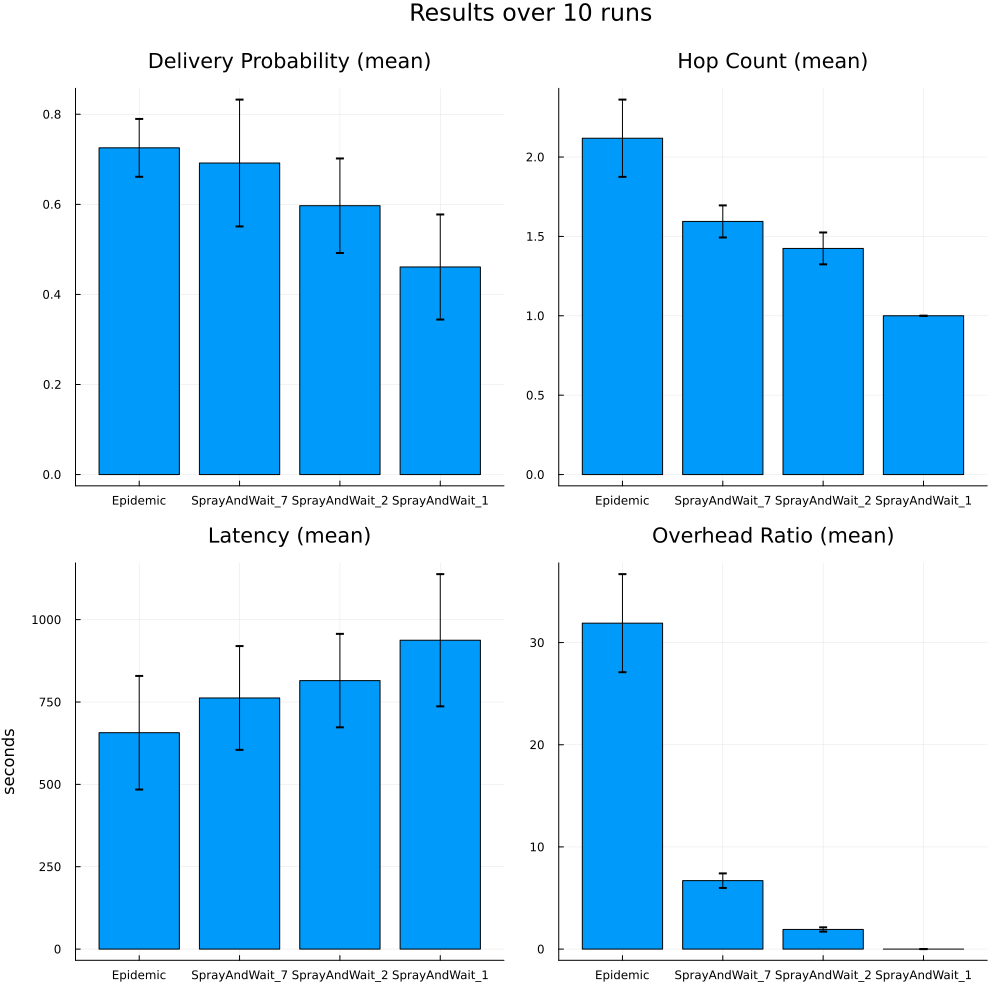

In [17]:
using Plots
using Statistics

g_strat = groupby(df, :Strategy)
df1 = combine(g_strat, [:delivery_prob, :hops_avg, :latency_avg, :overhead_ratio] .=> mean)
df2 = combine(g_strat, [:delivery_prob, :hops_avg, :latency_avg, :overhead_ratio] .=> minimum)
df1 = innerjoin(df1, df2, on = :Strategy)
df2 = combine(g_strat, [:delivery_prob, :hops_avg, :latency_avg, :overhead_ratio] .=> maximum)
df1 = innerjoin(df1, df2, on = :Strategy)
p1 = bar(df1[!,"Strategy"], df1[!, "delivery_prob_mean"], label="", yerr=([df1[!, "delivery_prob_mean"]-df1[!, "delivery_prob_minimum"] df1[!, "delivery_prob_maximum"]-df1[!, "delivery_prob_mean"]]))
title!("Delivery Probability (mean)")

#df1 = combine(g_strat, [:hops_avg] .=> mean)
p2 = bar(df1[!,"Strategy"], df1[!, "hops_avg_mean"], label="", yerr=([df1[!, "hops_avg_mean"]-df1[!, "hops_avg_minimum"] df1[!, "hops_avg_maximum"]-df1[!, "hops_avg_mean"]]))
title!("Hop Count (mean)")

#df1 = combine(g_strat, [:latency_avg] .=> mean)
p3 = bar(df1[!,"Strategy"], df1[!, "latency_avg_mean"], label="", yerr=([df1[!, "latency_avg_mean"]-df1[!, "latency_avg_minimum"] df1[!, "latency_avg_maximum"]-df1[!, "latency_avg_mean"]]))
title!("Latency (mean)")
ylabel!("seconds")


p4 = bar(df1[!,"Strategy"], df1[!, "overhead_ratio_mean"], label="", yerr=([df1[!, "overhead_ratio_mean"]-df1[!, "overhead_ratio_minimum"] df1[!, "overhead_ratio_maximum"]-df1[!, "overhead_ratio_mean"]]))
title!("Overhead Ratio (mean)")

plot(p1,p2, p3, p4, layout=(2,2), size=(1000,1000), plot_title="Results over " * string(NUM_RUNS) * " runs")



In [18]:
df1

Row,Strategy,delivery_prob_mean,hops_avg_mean,latency_avg_mean,overhead_ratio_mean,delivery_prob_minimum,hops_avg_minimum,latency_avg_minimum,overhead_ratio_minimum,delivery_prob_maximum,hops_avg_maximum,latency_avg_maximum,overhead_ratio_maximum
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Epidemic,0.72539,2.11838,656.766,31.9021,0.661157,1.875,484.331,27.1011,0.788618,2.27273,902.123,37.284
2,SprayAndWait_7,0.691713,1.5943,762.282,6.69745,0.550847,1.49315,604.805,5.9863,0.794872,1.71111,893.526,7.35616
3,SprayAndWait_2,0.596905,1.4243,814.986,1.92019,0.491935,1.32394,673.091,1.71053,0.651786,1.47887,1094.76,2.2459
4,SprayAndWait_1,0.460921,1.0,937.624,0.0,0.344262,1.0,736.973,0.0,0.55,1.0,1177.1,0.0


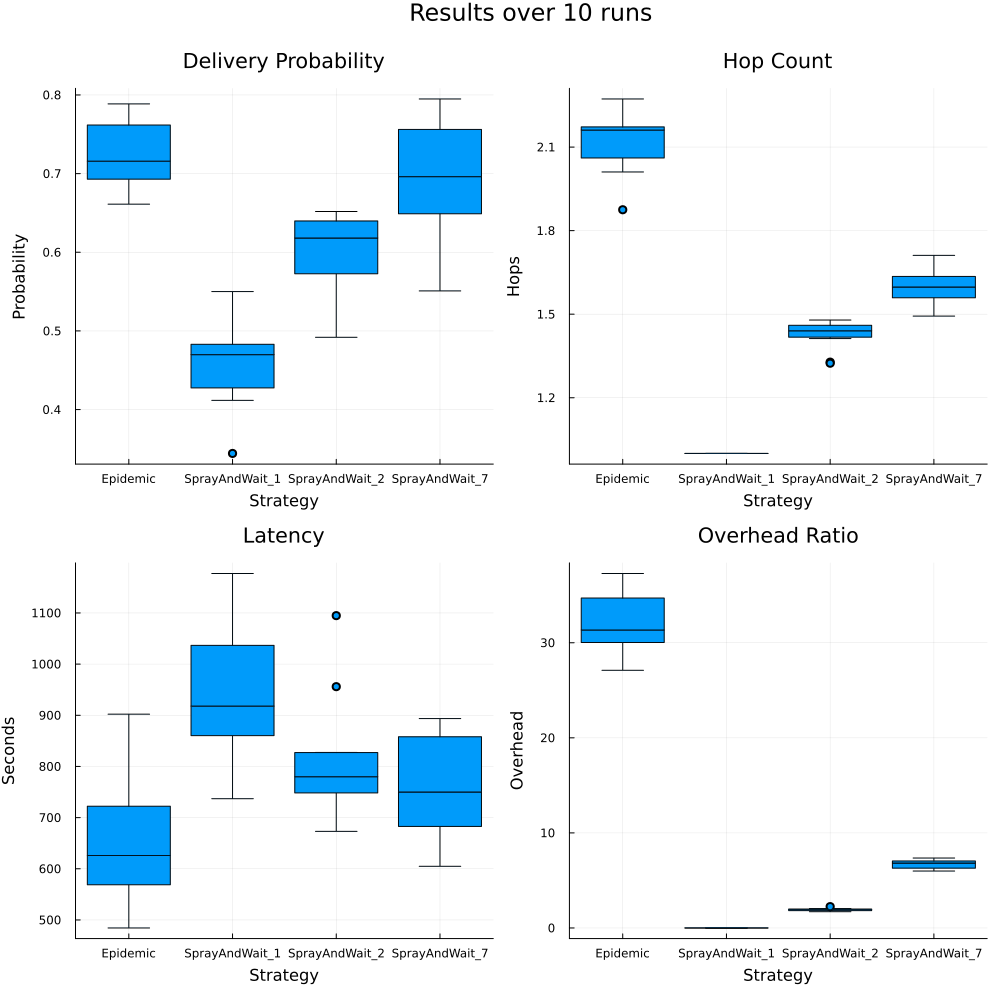

In [19]:
using StatsPlots


p1 = @df df boxplot(:Strategy, :delivery_prob, title="Delivery Probability", ylabel="Probability", xlabel="Strategy", legend=false)
p2 = @df df boxplot(:Strategy, :hops_avg, title="Hop Count", ylabel="Hops", xlabel="Strategy", legend=false)
p3 = @df df boxplot(:Strategy, :latency_avg, title="Latency", ylabel="Seconds", xlabel="Strategy", legend=false)
p4 = @df df boxplot(:Strategy, :overhead_ratio, title="Overhead Ratio", ylabel="Overhead", xlabel="Strategy", legend=false)

plot(p1, p2, p3, p4, layout=(2,2), size=(1000,1000), plot_title="Results over " * string(NUM_RUNS) * " runs")
